In [ ]:
# Set cuda device to 3
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline
from PIL import Image, ImageChops

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
)
mask_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
)
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

#open image from /home/sanoojan/e4s/example/input/faceswap/source.jpg

init_image= PIL.Image.open("/home/sanoojan/e4s/example/input/faceswap/andy/546.jpg").convert("RGB").resize((512, 512))
example_image= PIL.Image.open("/home/sanoojan/e4s/example/input/faceswap/peng/peng_800.jpg").convert("RGB").resize((512, 512))
mask_image= PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/00000_skin.png").convert("RGB").resize((512, 512))
mask_mouth=PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/00000_mouth.png").convert("RGB").resize((512, 512))
mask_image=ImageChops.subtract(mask_image,mask_mouth)


# init_image = download_image(img_url).resize((512, 512))
# mask_image = download_image(mask_url).resize((512, 512))
# example_image = download_image(example_url).resize((512, 512))

pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]

# plot the image, init_image, mask_image, example_image as subplots side by side

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(18, 30))
axs[0].imshow(init_image)
axs[0].set_title('init_image')
axs[1].imshow(mask_image)
axs[1].set_title('mask_image')
axs[2].imshow(example_image)
axs[2].set_title('example_image')
axs[3].imshow(image)
axs[3].set_title('image')




# image

In [1]:
import cv2
import numpy as np

# Load the binary mask image
mask = cv2.imread('/home/sanoojan/Paint_for_swap/dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphology operations
kernel = np.ones((5, 5), np.uint8)

# Perform dilation to expand the white regions, which can change the shape slightly
dilated_mask = cv2.dilate(mask, kernel, iterations=1)

# Perform erosion to shrink the white regions, which can also change the shape slightly
eroded_mask = cv2.erode(mask, kernel, iterations=1)

# You can save the modified mask to a new file
cv2.imwrite('modified_mask.png', dilated_mask)  # or 'modified_mask.png', eroded_mask

# You may need to experiment with the kernel size and the number of iterations to achieve the desired shape modification.


True

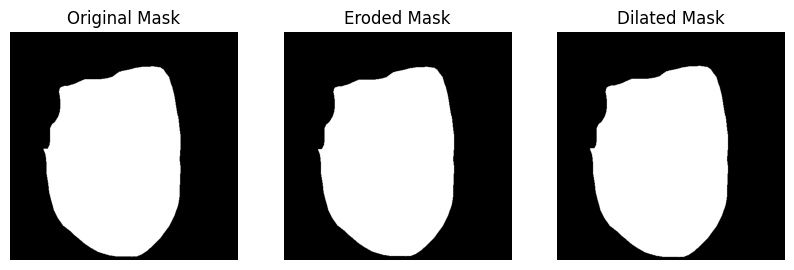

In [2]:
import matplotlib.pyplot as plt
from skimage import io, morphology

# Load the binary mask image
mask = io.imread('/home/sanoojan/Paint_for_swap/dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', as_gray=True)

# Use binary erosion and dilation to modify the shape
eroded_mask = morphology.binary_erosion(mask)
dilated_mask = morphology.binary_dilation(mask)

# Display the original and modified masks
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Original Mask')

ax[1].imshow(eroded_mask, cmap='gray')
ax[1].set_title('Eroded Mask')

ax[2].imshow(dilated_mask, cmap='gray')
ax[2].set_title('Dilated Mask')

for a in ax:
    a.axis('off')

plt.show()
# Make sure you have the scikit-image library installed (pip install scikit-image) before running this script. Adjust the parameters and techniques used to achieve the desired shape modification. You'll need to provide the path to your mask image in the io.imread function.







In [3]:
import cv2
import numpy as np

# Load the mask image
mask = cv2.imread('/home/sanoojan/Paint_for_swap/dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', cv2.IMREAD_GRAYSCALE)

# Define the transformation matrix
rows, cols = mask.shape
M = np.float32([[1, 0, 50], [0, 1, 50]])  # Example transformation matrix for shifting

# Apply the transformation to the mask
transformed_mask = cv2.warpAffine(mask, M, (cols, rows))

# You can save the transformed mask to a new file
cv2.imwrite('transformed_mask.png', transformed_mask)


True

In [11]:
import cv2
import numpy as np

# Load the binary mask image
mask = cv2.imread('/home/sanoojan/Paint_for_swap/dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', cv2.IMREAD_GRAYSCALE)

# Define the number of iterations for dilation and erosion
expand_iterations = np.random.randint(2, 5)  # Randomly select the number of iterations for dilation
shrink_iterations = np.random.randint(2, 5)  # Randomly select the number of iterations for erosion
expand_iterations=7
shrink_iterations=10
# Randomly expand the white regions
expanded_mask = cv2.dilate(mask, None, iterations=expand_iterations)

# Randomly shrink the white regions
shrink_mask = cv2.erode(expanded_mask, None, iterations=shrink_iterations)

# You can save the modified mask to a new file
cv2.imwrite('modified_mask.png', shrink_mask)


True

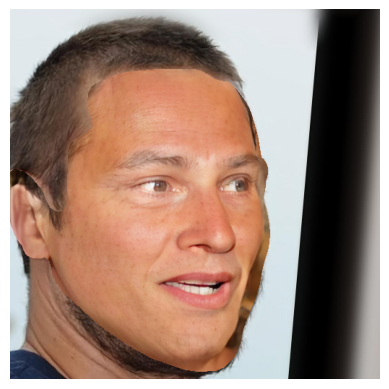

In [25]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = 'dataset/FaceData/CelebAMask-HQ/Val_target/28000.jpg'  # Replace with the actual image path
second_image_path='/home/sanoojan/e4s/Results/testbench/reenact/results/29000.png'





mask_path='dataset/FaceData/CelebAMask-HQ/target_mask/28000.png'
preserve=[1,2,4,5,8,9 ,6,7,10,11,12 ]

mask_img = Image.open(mask_path).convert('L')
mask_img = np.array(mask_img)  # Convert the label to a NumPy array if it's not already

# Create a mask to preserve values in the 'preserve' list
# preserve = [1,2,4,5,8,9,17 ]
# preserve = self.preserve
mask = np.isin(mask_img, preserve)

# Create a converted_mask where preserved values are set to 255
converted_mask = np.zeros_like(mask_img)
converted_mask[mask] = 255
# convert to PIL image
# mask_img=Image.fromarray(converted_mask).convert('L')


image = cv2.imread(image_path)

#reshape to 25
image = cv2.resize(image, (512, 512))

second_image = cv2.imread(second_image_path)
second_image = cv2.resize(second_image, (512, 512))

# replace the image with the second image where the mask is 255
second_image[converted_mask == 0] = image[converted_mask == 0]

#


# display mask_img
# plt.imshow(mask_img, cmap='gray')

# # Display the image with landmarks
plt.imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
pil_im = T.resize((1024,1024), Image.BILINEAR)
mask = faceParsing_demo(faceParsing_model, pil_im, convert_to_seg12=opt.seg12, model_name=opt.faceParser_name)

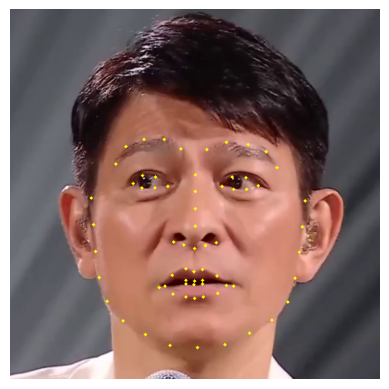

In [10]:
import dlib
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'results_video/New_v4_no_grad_ep49_mouth_p/Andy2cropped_face/260.png'  # Replace with the actual image path
image = cv2.imread(image_path)
image = cv2.resize(image, (512, 512))
# Initialize the face detector and the landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("Other_dependencies/DLIB_landmark_det/shape_predictor_68_face_landmarks.dat") # Replace with the actual path to the shape predictor file

# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Iterate through the faces found in the image
for face in faces:
    # Find the facial landmarks for the face region
    landmarks = predictor(gray, face)
    
    # Loop over the landmarks and draw them on the image
    for i, landmark in enumerate(landmarks.parts()):
        
        x, y = landmark.x, landmark.y
        # print(i, x, y)
        cv2.circle(image, (x, y), 2, (0, 255, 255), -1)  # Draw a small red circle on the image
        # cv2.putText(image, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)  # Put a number label on each landmark

# Display the image with landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [2]:
import cv2
import numpy as np
import dlib

# Read the image and the face mask
image = cv2.imread('dataset/FaceData/CelebAMask-HQ/Val_target/28000.jpg')
mask = cv2.imread('/home/sanoojan/Paint_for_swap/dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', 0)

# Detect face landmarks
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("Other_dependencies/DLIB_landmark_det/shape_predictor_68_face_landmarks.dat")  # Download this file from dlib's website
detections = detector(image, 1)
for face in detections:
    landmarks = predictor(image, face)

# Convert the landmarks to a numpy array
landmarks_array = []
for i in range(0, 68):
    landmarks_array.append((landmarks.part(i).x, landmarks.part(i).y))
landmarks_array = np.array(landmarks_array)
# print(landmarks_array)
# Apply Delaunay triangulation

# rect = (0, 0, image.shape[1], image.shape[0])
# subdiv = cv2.Subdiv2D(rect)
# for point in landmarks_array:
#     subdiv.insert(tuple(point))
# triangles = subdiv.getTriangleList()

# # Apply deformation on the edges
# for triangle in triangles:
#     pt1 = (triangle[0], triangle[1])
#     pt2 = (triangle[2], triangle[3])
#     pt3 = (triangle[4], triangle[5])
#     cv2.line(image, pt1, pt2, (255, 255, 255), 1)
#     cv2.line(image, pt2, pt3, (255, 255, 255), 1)
#     cv2.line(image, pt1, pt3, (255, 255, 255), 1)

# # Display the image in plt

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))




ImportError: libcudnn.so.8: cannot open shared object file: No such file or directory

In [20]:
from volumentations import *
from PIL import Image
import cv2

def get_augmentation(patch_size):
    return Compose([
        Rotate((-15, 15), (0, 0), (0, 0), p=0.5),
        RandomCropFromBorders(crop_value=0.1, p=0.5),
        ElasticTransform((0, 0.25), interpolation=2, p=0.1),
        Resize(patch_size, interpolation=1, resize_type=0, always_apply=True, p=1.0),
        Flip(0, p=0.5),
        Flip(1, p=0.5),
        Flip(2, p=0.5),
        RandomRotate90((1, 2), p=0.5),
        GaussianNoise(var_limit=(0, 5), p=0.2),
        RandomGamma(gamma_limit=(80, 120), p=0.2),
    ], p=1.0)

aug = get_augmentation((64, 128, 128))

mask_path='dataset/FaceData/CelebAMask-HQ/target_mask/28000.png'
preserve=[1,2,4,5,8,9 ,6,7,10,11,12 ]

mask_img = Image.open(mask_path).convert('L')
mask_img = np.array(mask_img)  # Convert the label to a NumPy array if it's not already

# Create a mask to preserve values in the 'preserve' list
# preserve = [1,2,4,5,8,9,17 ]
# preserve = self.preserve
mask = np.isin(mask_img, preserve)

# Create a converted_mask where preserved values are set to 255
converted_mask = np.zeros_like(mask_img)
converted_mask[mask] = 1

img=cv2.imread('dataset/FaceData/CelebAMask-HQ/Val_target/28000.jpg')
img=cv2.resize(img,(512,512))
# lbl=Image.open('/home/sanoojan/Paint_for_swap/dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png')

lbl=converted_mask 
img=np.array(img)
img=img.transpose(2,0,1)
# dtype np.uint8
lbl=np.array(lbl)
#change shape from 512 ,512 to 1,512,512
lbl=lbl[np.newaxis,:]




img = np.random.randint(0, 255, size=(128, 256, 256), dtype=np.uint8)
lbl = np.random.randint(0, 1, size=(128, 256, 256), dtype=np.uint8)
# img=

# with mask
data = {'image': img, 'mask': lbl}
aug_data = aug(**data)
img, lbl = aug_data['image'], aug_data['mask']

# # without mask
# data = {'image': img}
# aug_data = aug(**data)
# img = aug_data['image']

In [21]:
img.shape

(64, 128, 128)

TypeError: Invalid shape (128, 128, 64) for image data

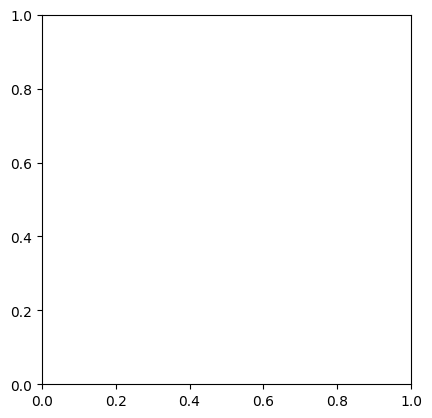

In [15]:
# display img

import matplotlib.pyplot as plt
plt.imshow(img.transpose(1,2,0))

torch.Size([3, 512, 512])


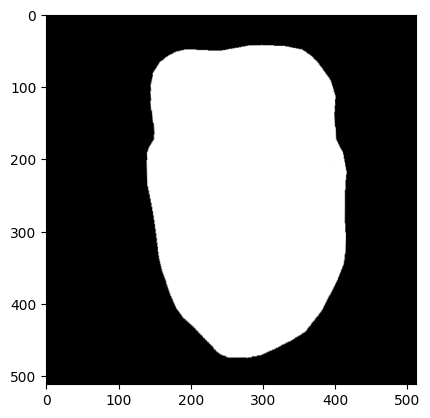

In [23]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import torch
from torchvision import transforms
from PIL import Image
import torchvision.models as models
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import torch
from PIL import Image
import numpy as np
import torch as torch




# 图像扭曲的算法
import sys
from torchvision.transforms import ToTensor, ToPILImage
sys.path.append('/data/pzb/EAT/attack')
from thinplatespline.batch import TPS
from thinplatespline.tps import tps_warp
TOTEN = ToTensor()
TOPIL = ToPILImage()
DEVICE = torch.device("cpu")

def grid_points_2d(width, height, device=DEVICE):
    """
    Create 2d grid points. Distribute points across a width and height,
    with the resulting coordinates constrained to -1, 1
    returns tensor shape (width * height, 2)
    """
    xx, yy = torch.meshgrid(
        [torch.linspace(-1.0, 1.0, height, device=device),
         torch.linspace(-1.0, 1.0, width, device=device)])
    return torch.stack([yy, xx], dim=-1).contiguous().view(-1, 2)
def noisy_grid(width, height, noise_matrix, device=DEVICE):
    """
    Make uniform grid points, and add noise except for edge points.
    """
    grid = grid_points_2d(width, height, device)
    mod = torch.zeros([height, width, 2], device=device)
    mod[1:height - 1, 1:width - 1, :] = noise_matrix
    return grid + mod.reshape(-1, 2)
def grid_to_img(grid_points, width, height):
    """
    convert (N * 2) tensor of grid points in -1, 1 to tuple of (x, y)
    scaled to width, height.
    return (x, y) to plot"""
    grid_clone = grid_points.clone().detach().cpu().numpy()
    x = (1 + grid_clone[..., 0]) * (width - 1) / 2
    y = (1 + grid_clone[..., 1]) * (height - 1) / 2
    return x.flatten(), y.flatten()
def decow(img):
    n, c, w, h = img.size()
    device = torch.device('cuda')
    a = 3
    X = grid_points_2d(a, a, device)
    noise = (torch.rand([a-2, a-2, 2]) - 0.5) * 0.5
    # noise = (torch.rand([1, 1, 2]) - 0.5)
    Y = noisy_grid(a, a, noise, device)
    tpsb = TPS(size=(h, w), device=device)
    warped_grid_b = tpsb(X[None, ...], Y[None, ...])
    warped_grid_b = warped_grid_b.repeat(img.shape[0], 1, 1, 1)
    awt_img = torch.grid_sampler_2d(img, warped_grid_b, 0, 0, False)
    return awt_img




image_path = 'dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/2/05998_skin.png'
image = Image.open(image_path)


transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # 
    transforms.ToTensor(),  # 
])

tensor = transform(image)
mask = tensor.unsqueeze(0)  #


print(tensor.shape)


mask = decow(mask.cuda())
tensor_to_image = transforms.ToPILImage()
image = tensor_to_image(mask.cpu().squeeze())
#

image.save('face-aug.png')

# display image
import matplotlib.pyplot as plt
plt.imshow(image)





















In [13]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
path="dataset/FaceData/CelebAMask-HQ/CelebA-HQ-img/0.jpg"
image = Image.open(path)
texts=['a photo of happy face','a photo of sad face','a photo of angry face','a photo of surprised face','a photo of disgusted face','a photo of scared face','a photo of neutral face']
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)

Downloading: 100%|██████████| 316/316 [00:00<00:00, 660kB/s]
Downloading: 100%|██████████| 2.12M/2.12M [00:00<00:00, 28.9MB/s]


In [14]:
probs

tensor([[0.7464, 0.0017, 0.0108, 0.0308, 0.0066, 0.0104, 0.1934]],
       grad_fn=<SoftmaxBackward0>)

In [19]:
path="dataset/FaceData/CelebAMask-HQ/CelebA-HQ-img/28959.jpg"
image = Image.open(path)
texts=['a photo of happy face','a photo of sad face','a photo of angry face','a photo of surprised face','a photo of disgusted face','a photo of scared face','a photo of neutral face']
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)
# print probs and corrsponding texts
for i in range(len(texts)):
    print(f"{texts[i]}: {probs[0][i].item()}")

a photo of happy face: 0.0004288478521630168
a photo of sad face: 0.0048429458402097225
a photo of angry face: 0.027000706642866135
a photo of surprised face: 0.5407557487487793
a photo of disgusted face: 0.08239954710006714
a photo of scared face: 0.34355485439300537
a photo of neutral face: 0.001017412287183106
